<a href="https://colab.research.google.com/github/eldor-fozilov/data-science-contest/blob/main/Task_2_and_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## (Test) Data 

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Data Science Contest/X_exam.csv')

In [ ]:
test_data.fillna(0, inplace = True)
test_data.head(7)

,gender,age_code,region_code,c20220101,c20220102,c20220103,c20220104,c20220105,c20220106,c20220107,...,t20220817,t20220818,t20220819,t20220820,t20220821,t20220822,t20220823,t20220824,t20220825,t20220826
0,2,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,10,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,8,16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
daily_login_df = test_data.iloc[:, 3:241]
daily_login_df.head()

,c20220101,c20220102,c20220103,c20220104,c20220105,c20220106,c20220107,c20220108,c20220109,c20220110,...,c20220817,c20220818,c20220819,c20220820,c20220821,c20220822,c20220823,c20220824,c20220825,c20220826
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


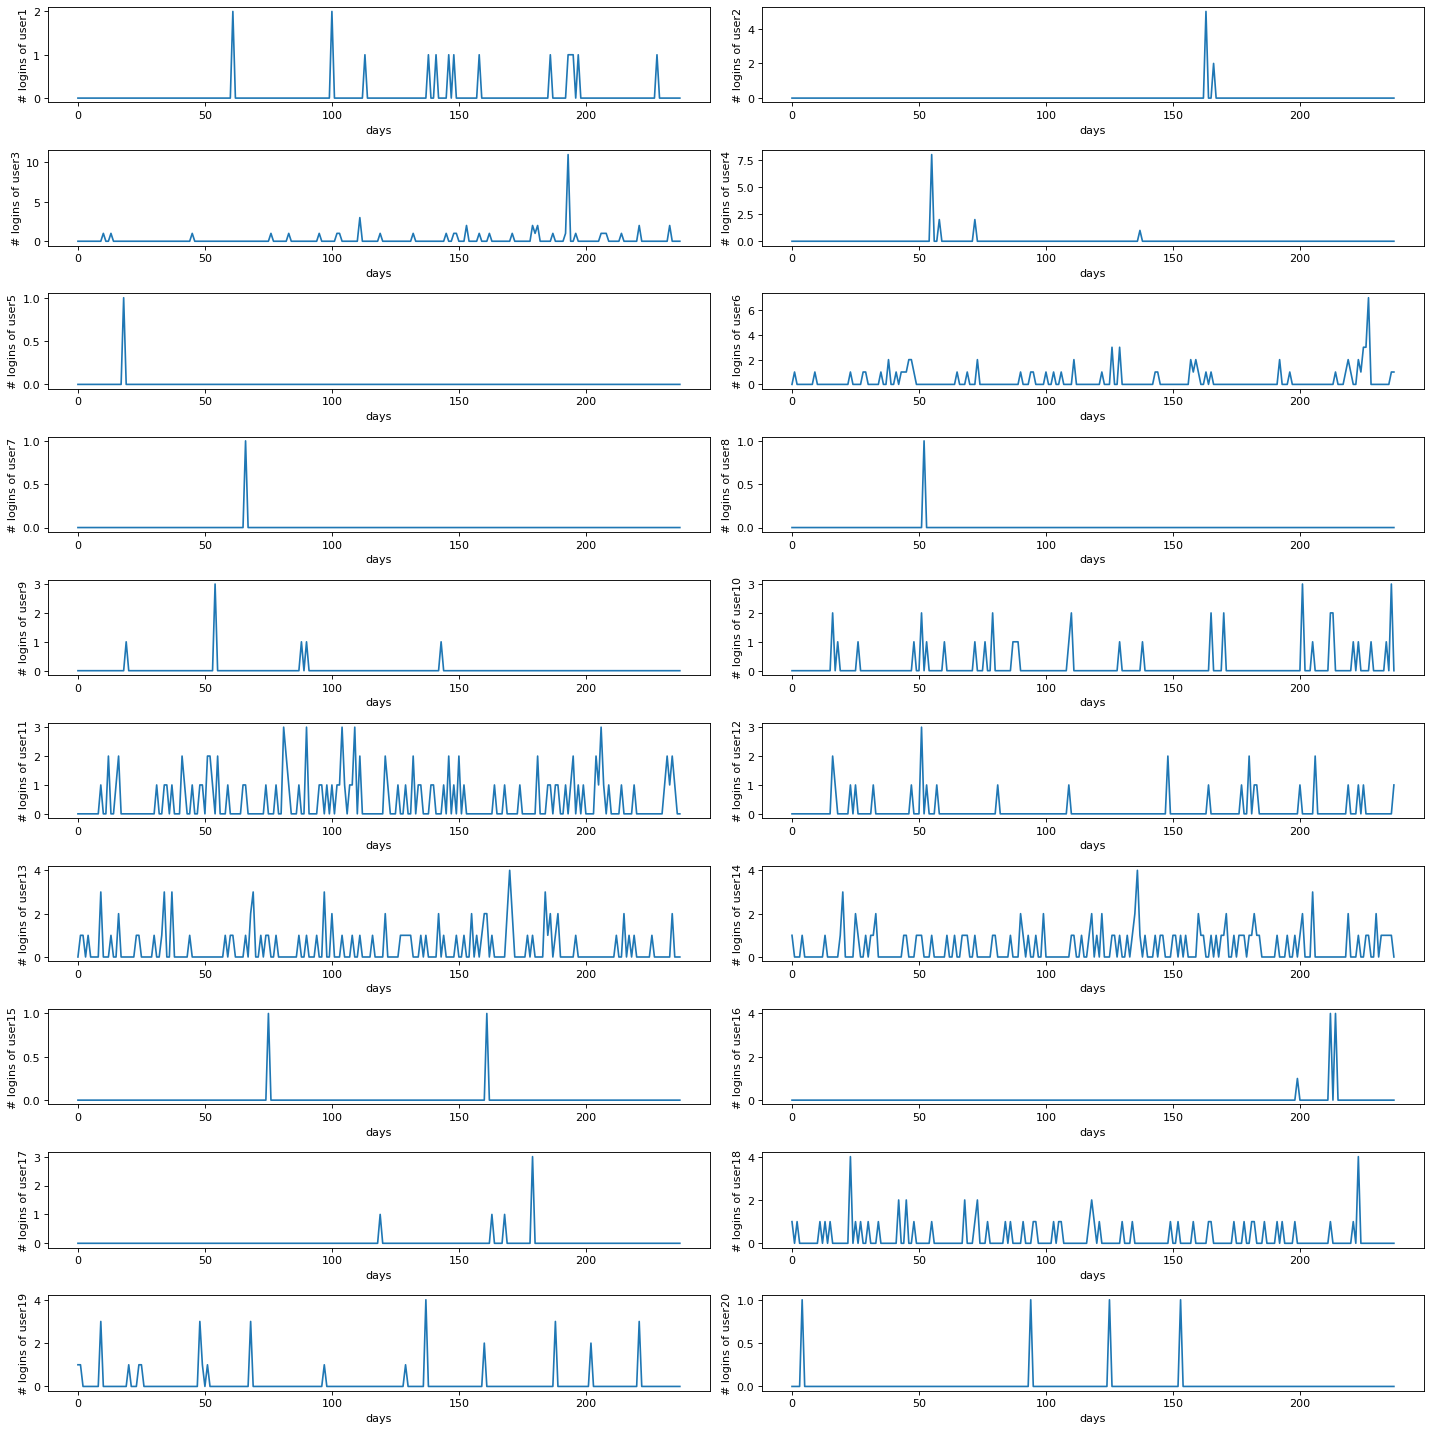

In [ ]:
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(18, 18),dpi =80)

for user, ax in enumerate(axs.ravel()):
  ax.plot( np.arange(len(daily_login_df.columns)),daily_login_df.iloc[user,:])
  ax.set_ylabel(f'# logins of user{user + 1}')
  ax.set_xlabel('days')
  plt.tight_layout()


In [ ]:
data_transformed = test_data.loc[:,['gender','age_code','region_code']]
data_transformed.head()

,gender,age_code,region_code
0,2,4,4
1,2,10,15
2,2,4,2
3,1,8,1
4,2,8,2


In [ ]:
for i in range(3):
  j = 238 * i + 3
  k = 1
  while j < 238*(i+1) + 3:
    weekly_info = np.sum(test_data.iloc[:,j:j+7], axis = 1)
    if i == 0:
      data_transformed[f'c_week{k}'] = weekly_info
    elif i == 1:
      data_transformed[f's_week{k}'] = weekly_info
    else:
      data_transformed[f't_week{k}'] = weekly_info
    k += 1
    j += 7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
data_transformed.head()

,gender,age_code,region_code,c_week1,c_week2,c_week3,c_week4,c_week5,c_week6,c_week7,...,t_week25,t_week26,t_week27,t_week28,t_week29,t_week30,t_week31,t_week32,t_week33,t_week34
0,2,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,10,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4,2,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,8,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
weekly_login_df = data_transformed.iloc[:, 3:37]
weekly_login_df.head()

,c_week1,c_week2,c_week3,c_week4,c_week5,c_week6,c_week7,c_week8,c_week9,c_week10,...,c_week25,c_week26,c_week27,c_week28,c_week29,c_week30,c_week31,c_week32,c_week33,c_week34
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,5.0,1.0,12.0,1.0,3.0,1.0,2.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


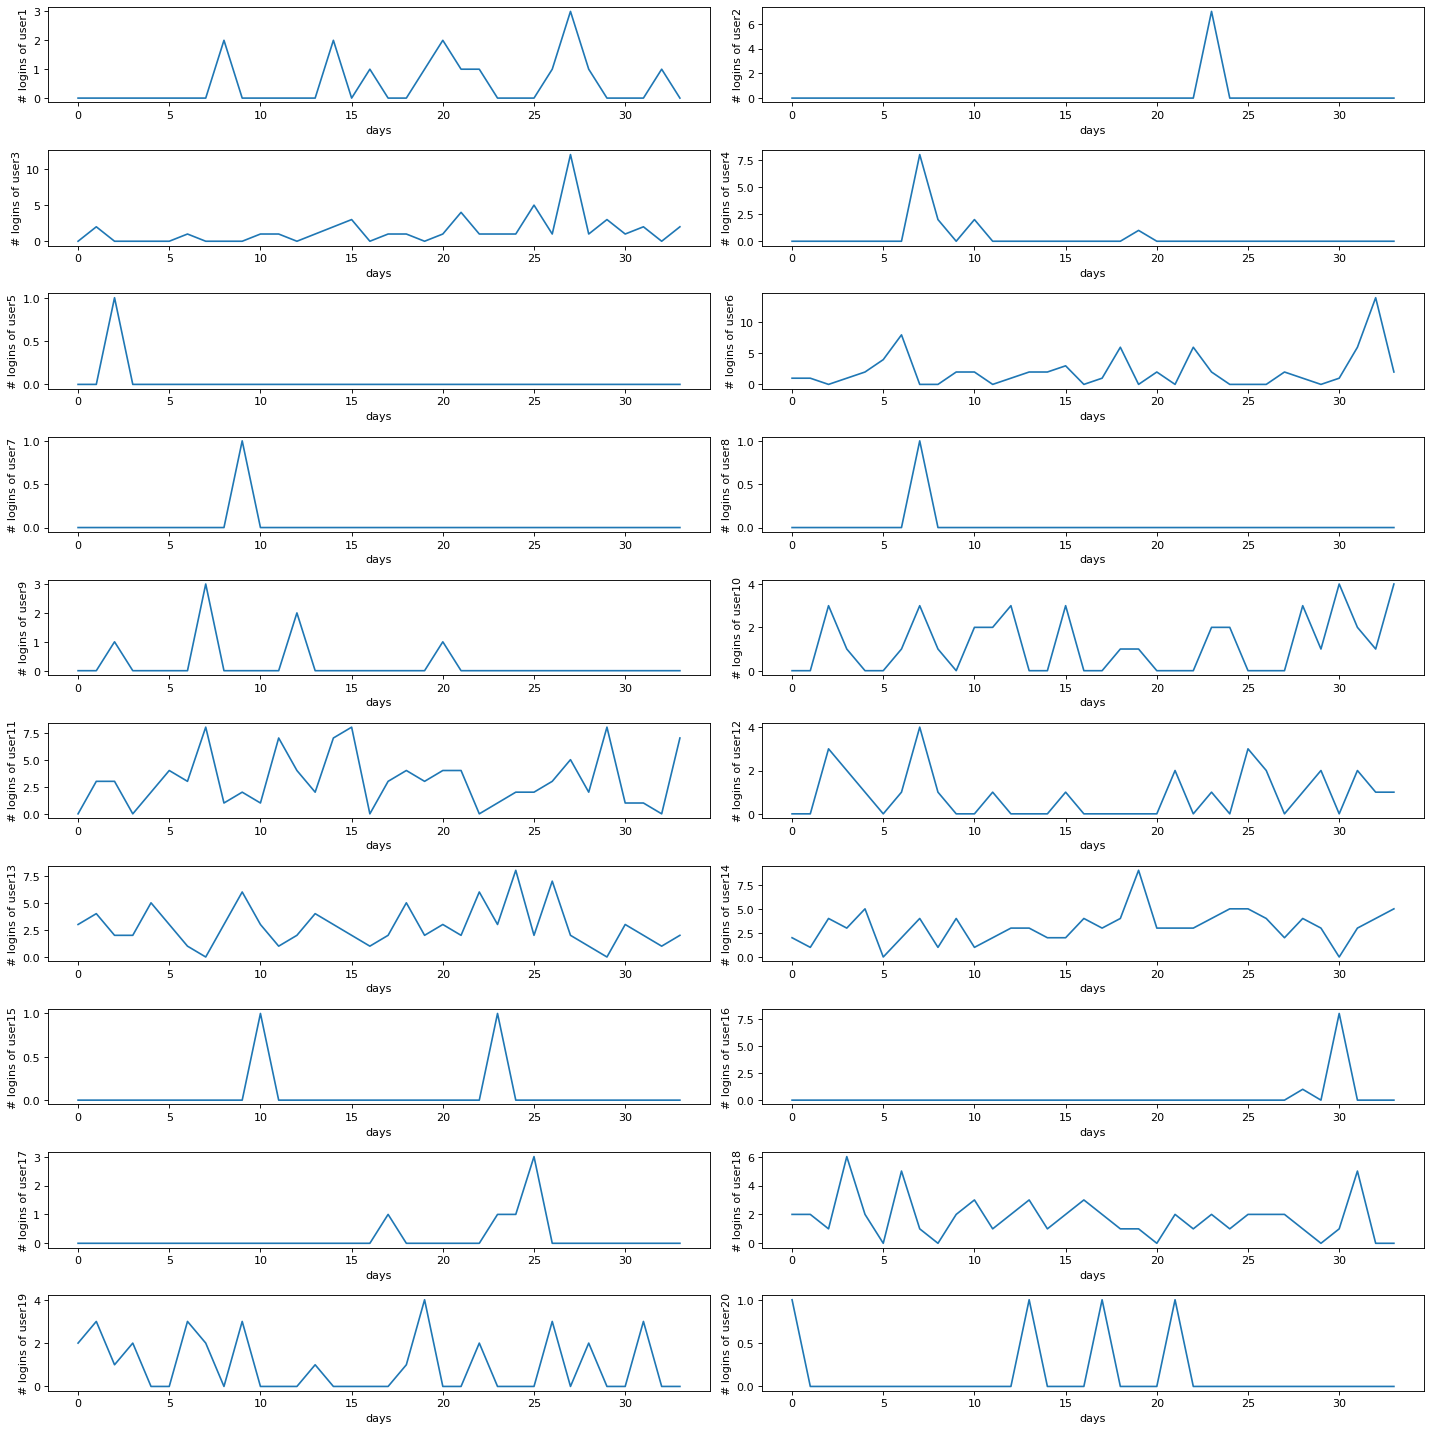

In [ ]:
user = np.arange(0,20)
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(18, 18),dpi =80)

for user, ax in enumerate(axs.ravel()):
  ax.plot( np.arange(len(weekly_login_df.columns)), weekly_login_df.iloc[user,:])
  ax.set_ylabel(f'# logins of user{user + 1}')
  ax.set_xlabel('days')
  plt.tight_layout()

## Time Series Modelling

In [ ]:
#import pmdarima as pm
#from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [ ]:
results = []
for index in weekly_login_df.index:
  if sum(weekly_login_df.iloc[index,-5:]) == 0:
    results.append(0)
    continue
  
  model = sm.tsa.arima.ARIMA(weekly_login_df.iloc[index,:], order= (5,1,0))
  result = model.fit()

  pred = result.get_forecast(1).predicted_mean
  if pred >= 0.9:
    results.append(1)
  else:
    results.append(0)

  

In [3]:
predictions = pd.read_csv('predictions.csv', header = None)
predictions.columns = ['business_prob']
predictions.head(5)

,business_prob
0,0.543184
1,0.426567
2,0.506636
3,0.335039
4,0.386934


## Task 2 Prediction

In [ ]:
login_pred = results

In [4]:
business_owners = predictions.values >= 0.677 # threshold
sum(business_owners)

array([45223])

In [5]:
pop_up_ad = [int(i) for i in business_owners]
predictions['popup'] = pop_up_ad

## Task 3 Prediction

In [11]:
survey_ad = []
for k in zip(business_owners.ravel(), login_pred):
  if sum(k) == 2:
    survey_ad.append(1)
  else:
    survey_ad.append(0)

predictions['survey'] = survey_ad

In [15]:
sum(pop_up_ad)

45223

In [16]:
predictions.head()

,business_prob,popup,survey
0,0.543184,0,0
1,0.426567,0,0
2,0.506636,0,0
3,0.335039,0,0
4,0.386934,0,0


In [17]:
predictions.to_csv('submission.csv', index = False)